In [33]:
import pandas as pd
import plotnine as pn

In [34]:
# Load prior
estimated_prior = {
    'strong+\ncircumstantial': 0.31802426343154244,
    'strong+\ndeontic': 0.25375505488157135,
    'strong+\nepistemic': 0.10427498555748123,
    'weak+\ncircumstantial': 0.14298093587521662,
    'weak+\ndeontic': 0.042027729636048526,
    'weak+\nepistemic': 0.1389370306181398,
}

meaning_points = list(estimated_prior.keys())
probabilities = list(estimated_prior.values())


In [35]:
df_estimated_prior = pd.DataFrame(
    {
        'meaning point': meaning_points,
        'probability': probabilities,
        'prior': ['estimated'] * len(meaning_points)        
    }
)
df_estimated_prior

,meaning point,probability,prior
0,strong+\ncircumstantial,0.318024,estimated
1,strong+\ndeontic,0.253755,estimated
2,strong+\nepistemic,0.104275,estimated
3,weak+\ncircumstantial,0.142981,estimated
4,weak+\ndeontic,0.042028,estimated
5,weak+\nepistemic,0.138937,estimated


In [36]:
df_uniform_prior = pd.DataFrame(
    {
        'meaning point': meaning_points,
        'probability': [1/len(meaning_points)] * len(meaning_points),
        'prior': ['uniform'] * len(meaning_points)
    }
)

In [37]:
data = pd.concat([df_estimated_prior, df_uniform_prior])
data

,meaning point,probability,prior
0,strong+\ncircumstantial,0.318024,estimated
1,strong+\ndeontic,0.253755,estimated
2,strong+\nepistemic,0.104275,estimated
3,weak+\ncircumstantial,0.142981,estimated
4,weak+\ndeontic,0.042028,estimated
5,weak+\nepistemic,0.138937,estimated
0,strong+\ncircumstantial,0.166667,uniform
1,strong+\ndeontic,0.166667,uniform
2,strong+\nepistemic,0.166667,uniform
3,weak+\ncircumstantial,0.166667,uniform


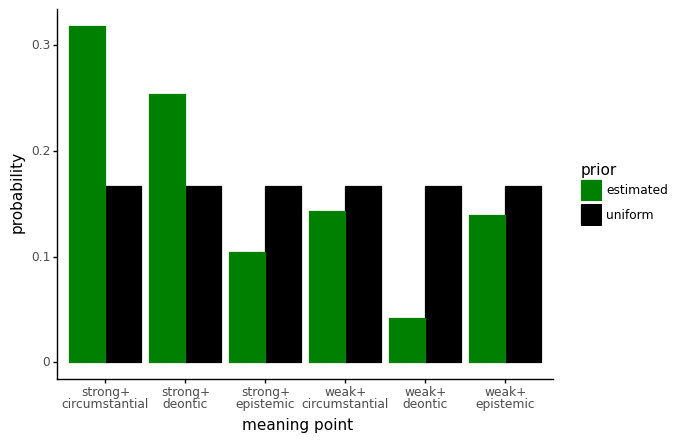

<ggplot: (400416753)>

In [38]:
barplot = (
    pn.ggplot(
        data=data, 
        mapping=pn.aes(x='meaning point', y='probability')
    )
    + pn.geom_bar(
        stat="identity", 
        position="dodge",
        mapping=pn.aes(
            fill='prior',
            color='prior',
        ),
    )
    + pn.scale_color_manual(values=['green', 'orange'])
    + pn.scale_fill_manual(values=['green', 'orange'])    
    + pn.theme_classic()
)
barplot

In [39]:
# or should we use a tile plot?
df_estimated_prior = pd.DataFrame(
    data=[
    ( 'strong', 'circumstantial', 0.31802426343154244, ),
    ( 'strong', 'deontic', 0.25375505488157135, ),
    ( 'strong', 'epistemic', 0.10427498555748123, ),
    ( 'weak', 'circumstantial', 0.14298093587521662, ),
    ( 'weak', 'deontic', 0.042027729636048526, ),
    ( 'weak', 'epistemic', 0.1389370306181398, ),
    ],
    columns=['modal force', 'modal flavor', 'probability',]
)

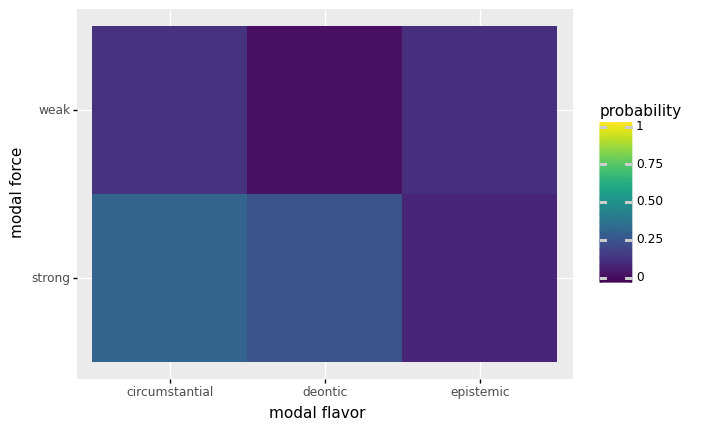

<ggplot: (400383088)>

In [40]:

heatmap_estimated_plot = (
        pn.ggplot(df_estimated_prior, pn.aes(x="modal flavor", y="modal force", fill="probability"))
        + pn.geom_tile()
        + pn.scale_fill_cmap(limits=[0,1])
        + pn.theme(
            # axis_text_y=pn.element_blank(),
            # axis_text_x=pn.element_blank(),
            axis_title_x=pn.element_text("modal force"),
            axis_title_y=pn.element_text("modal flavor"),
        )
)
heatmap_estimated_plot

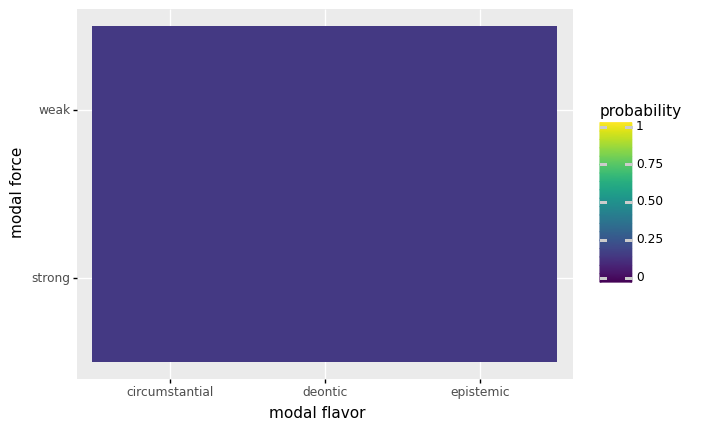

<ggplot: (402287226)>

In [41]:
df_uniform_prior = pd.DataFrame(
    data=[
    ( 'strong', 'circumstantial', 1/len(meaning_points), ),
    ( 'strong', 'deontic', 1/len(meaning_points), ),
    ( 'strong', 'epistemic', 1/len(meaning_points), ),
    ( 'weak', 'circumstantial', 1/len(meaning_points), ),
    ( 'weak', 'deontic', 1/len(meaning_points), ),
    ( 'weak', 'epistemic', 1/len(meaning_points), ),
    ],
    columns=['modal force', 'modal flavor', 'probability',]
)
heatmap_uniform_plot = (
        pn.ggplot(df_uniform_prior, pn.aes(x="modal flavor", y="modal force", fill="probability"))
        + pn.geom_tile()
        + pn.scale_fill_cmap(limits=[0,1])
        + pn.theme(
            # axis_text_y=pn.element_blank(),
            # axis_text_x=pn.element_blank(),
            axis_title_x=pn.element_text("modal force"),
            axis_title_y=pn.element_text("modal flavor"),
        )
)
heatmap_uniform_plot

In [42]:
# save, if u wan

# I only like the bar plots, but i'm glad i explored the heatmaps.

barplot.save("priors", width=10, height=10, dpi=300)


/Users/nathanielimel/miniforge3/envs/modals-effcomm/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 10 x 10 in image.
/Users/nathanielimel/miniforge3/envs/modals-effcomm/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: priors
